In [1]:
from typing import List, Tuple
import matplotlib.pyplot as plt
import heapq

In [2]:
class Node:

    def __init__(self, value) -> None:
        self.value = value

    def __eq__(self, other: object) -> bool:
        if isinstance(other, Node):
            return self.value == other.value
        elif isinstance(other, str):
            return self.value == other
        raise ValueError(f'Unable to convert from {type(other)} to {type(self)}')

    def __hash__(self) -> int:
        return hash(self.value)

    def __str__(self) -> str:
        return self.value

    def __repr__(self) -> str:
        return self.__str__()

    def __lt__(self, other: 'Node') -> bool:
        return self.value < other.value

In [3]:
class Graph:

    def __init__(self, directed=False):
        self.adjacency_list = {}
        self.directed = directed

    def add(self, node1: Node, node2: Node, weight: int = 1, accessibility_weight: int = 1) -> None:
        # If one of the nodes is not in the adjacency list, add it
        if node1 not in self.adjacency_list:
            self.adjacency_list[node1] = []
        if node2 not in self.adjacency_list:
            self.adjacency_list[node2] = []

        self.adjacency_list[node1].append((node2, weight, accessibility_weight))
        if not self.directed:
            self.adjacency_list[node2].append((node1, weight, accessibility_weight))

    def get_nodes(self) -> List[Node]:
        return list(self.adjacency_list.keys())

    def load(self, path) -> None:
        with open(path, 'r') as file:
            for line in file:
                node1, node2, weight, accessibility_weight = line.split()  # Each line has node1, node2, weight, and accessibility_weight separated by tab
                self.add(node1, node2, int(weight), int(accessibility_weight))

    def save(self, path) -> None:
        with open(path, 'w') as file:
            for node, neighbors in self.adjacency_list.items():
                for neighbor, weight, accessibility_weight in neighbors:
                    file.write(f"{node} {neighbor} {weight} {accessibility_weight}\n")

    def shortest_path(self, start, end, accessibility_level: int) -> Tuple[float, List[Node]]:
        return self._astar_shortest_path(start, end, accessibility_level)

    def _astar_shortest_path(self, start, end, accessibility_level: int) -> Tuple[float, List[Node]]:
        priority_queue = [(0, start)]  # (f, node)
        distances = {node: float('inf') for node in self.adjacency_list}
        distances[start] = 0
        parents = {}

        while priority_queue:
            _, current_node = heapq.heappop(priority_queue)

            if current_node == end:
                return distances[end], self._reconstruct_path(parents, start, end)

            for neighbor, weight, accessibility_weight in self.adjacency_list[current_node]:
                if accessibility_weight <= accessibility_level:
                    tentative_distance = distances[current_node] + weight
                    if tentative_distance < distances[neighbor]:
                        distances[neighbor] = tentative_distance
                        parents[neighbor] = current_node
                        heuristic = self._heuristic(neighbor, end)
                        f_score = tentative_distance + heuristic
                        heapq.heappush(priority_queue, (f_score, neighbor))

        return float('inf'), []  # No path found

    def _heuristic(self, node, goal) -> int:
        return 0

    def _reconstruct_path(self, parents, start, end) -> List[Node]:
        path = [end]
        while path[-1] != start:
            path.append(parents[path[-1]])
        path.reverse()
        return path

    def draw(self, positions) -> None:
        plt.figure(figsize=(8, 6))

        # Draw edges
        for node, neighbors in self.adjacency_list.items():
            for neighbor, weight, accessibility_weight in neighbors:
                plt.plot([positions[node][0], positions[neighbor][0]],
                         [positions[node][1], positions[neighbor][1]], 'k-')
                plt.text((positions[node][0] + positions[neighbor][0]) / 2,
                         (positions[node][1] + positions[neighbor][1]) / 2,
                         f"{weight}, {accessibility_weight}", fontsize=10, color='b')

        # Draw nodes
        for node, pos in positions.items():
            plt.plot(pos[0], pos[1], 'ro')
            plt.text(pos[0], pos[1], str(node), fontsize=12)

        plt.title('Graph Visualization')
        plt.xlabel('Node')
        plt.ylabel('Weight')
        plt.grid(True)
        plt.show()

Shortest distance between A and D: 5
Shortest path between A and D: [A, B, D]


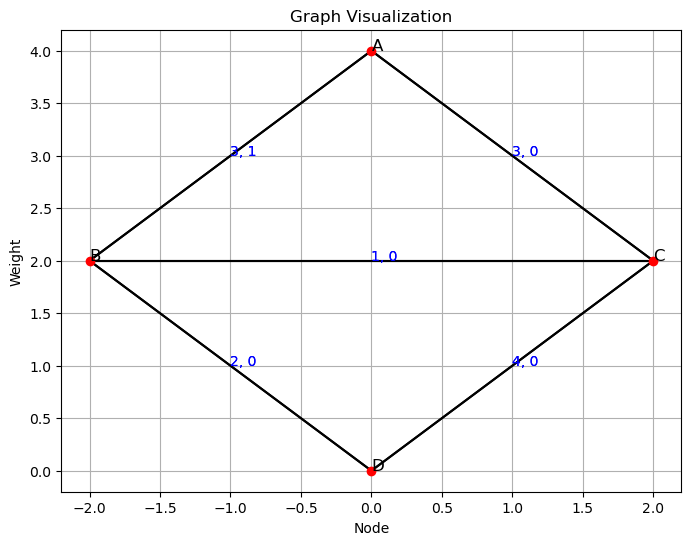

In [4]:
a = Node('A')
b = Node('B')
c = Node('C')
d = Node('D')

# Example usage:
# Create a graph
graph = Graph()
graph.add(a, b, 3, 1)  # edge with stairs (accessibility_weight=1)
graph.add(a, c, 3, 0)  # accessible edge (accessibility_weight=0)
graph.add(b, c, 1, 0)
graph.add(b, d, 2, 0)
graph.add(c, d, 4, 0)

# Save graph to a file
graph.save('output.txt')

# Find the shortest path between two nodes considering accessibility level
start = a
goal = d
accessibility_level = 1  # Maximum acceptable accessibility weight
path = graph.shortest_path(start, goal, accessibility_level)
print(f"Shortest distance between {start} and {goal}: {path[0]}")
print(f"Shortest path between {start} and {goal}: {path[1]}")

positions = {
    a: (0, 4),
    b: (-2, 2),
    c: (2, 2),
    d: (0, 0)
}

graph.draw(positions)

Shortest distance between A and D: 6
Shortest path between A and D: [A, C, B, D]


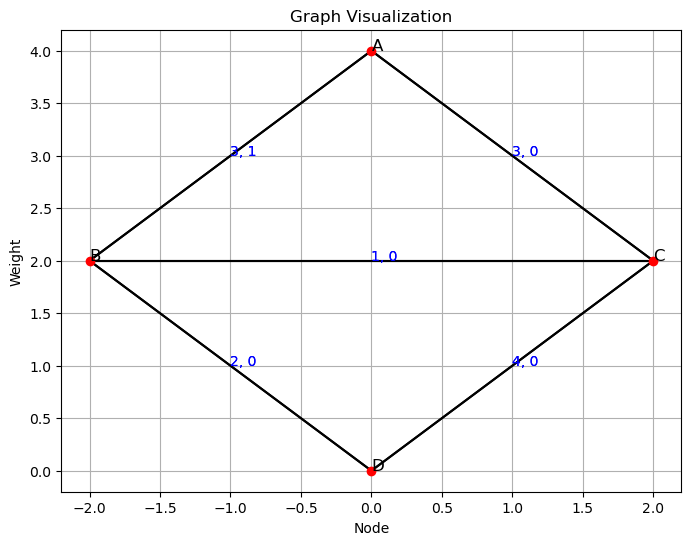

In [5]:
path = graph.shortest_path(start, goal, 0)
print(f"Shortest distance between {start} and {goal}: {path[0]}")
print(f"Shortest path between {start} and {goal}: {path[1]}")
graph.draw(positions)